# Heart Disease

### Dataset info:

- Age in years
- Sex: 1: male, 0: female
- cp: chest pain type
- trestbps: resting blood preasure (mm Hg) on admission to the hospital
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar
- restecg: resting electrocardiographic result
- thalac: maximum heart rate achived
- exang: excersice agina induced
- oldpeak: ST depression induced by exercise relative to rest

[Source](https://www.kaggle.com/ronitf/heart-disease-uci)

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
sns.set_style("darkgrid")

<AxesSubplot:>

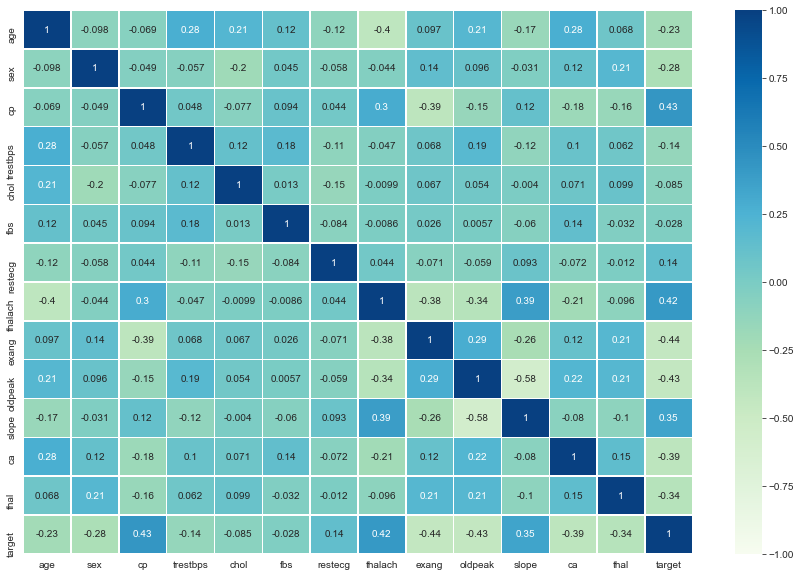

In [6]:
fig, ax = plt.subplots(figsize = (15,10))

sns.heatmap(df.corr(),
            annot = True,
            cmap = "GnBu",
            vmin = -1,
            vmax = 1,
            linewidths = 0.5,
            ax = ax)

## Categorical Variables

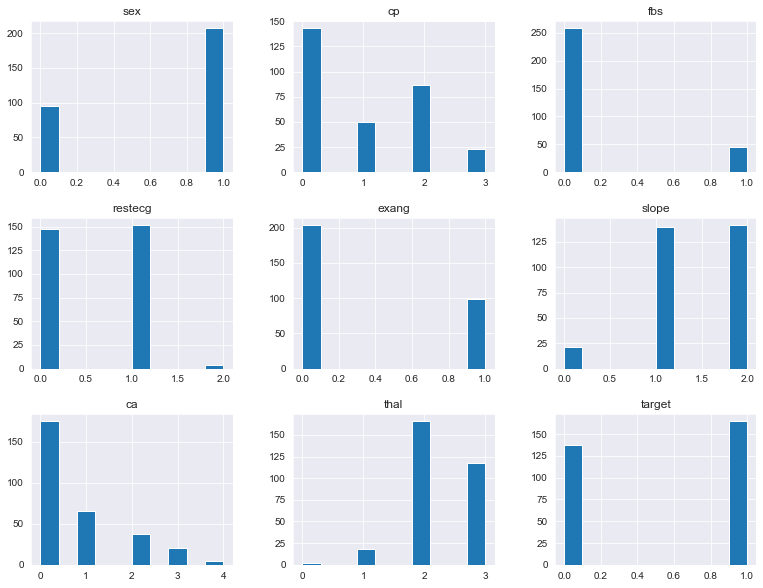

In [7]:
df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']].hist(figsize = (13,10))
plt.show()

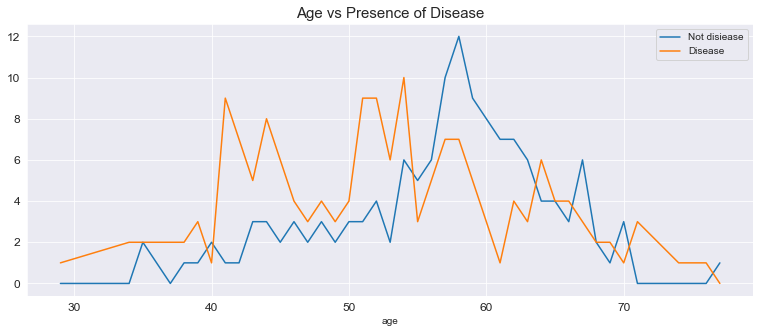

In [8]:
pd.crosstab(df.age, df.target).plot(figsize=(13,5), fontsize = 12)
plt.legend(["Not disiease", "Disease"])
plt.title("Age vs Presence of Disease", fontsize = 15)
plt.show()

In [9]:
df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


## Numerical variables

<AxesSubplot:>

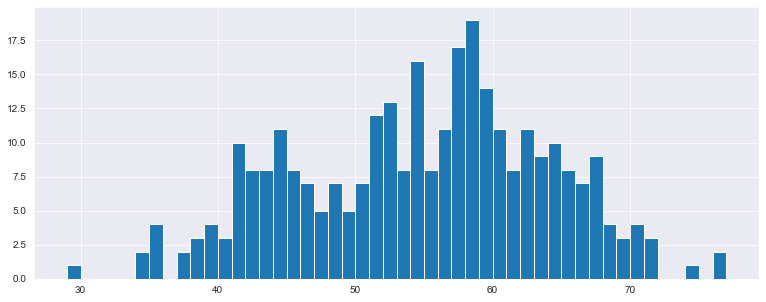

In [10]:
df.age.hist(figsize=(13,5), bins =max(df.age)-min(df.age))

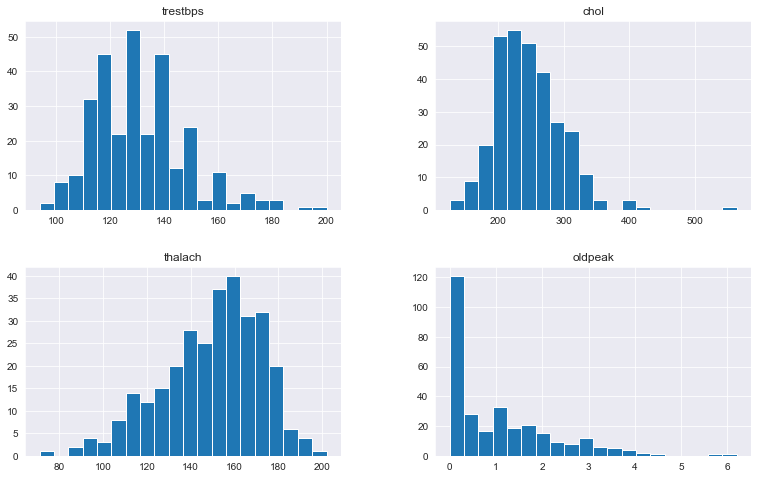

In [11]:
df[["trestbps","chol","thalach","oldpeak"]].hist(figsize=(13,8), bins = 20)
plt.show()

In [12]:
df[["trestbps","chol","thalach","oldpeak"]].describe()

,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,149.646865,1.039604
std,17.538143,51.830751,22.905161,1.161075
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000
50%,130.000000,240.000000,153.000000,0.800000
75%,140.000000,274.500000,166.000000,1.600000
max,200.000000,564.000000,202.000000,6.200000


## Data Analysis

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
cp_target = df[["cp","target"]].groupby("cp").mean()

In [15]:
restecg_target = df[["restecg","target"]].groupby("restecg").mean()

In [16]:
age_target = df[["age","target"]].groupby("age").mean()

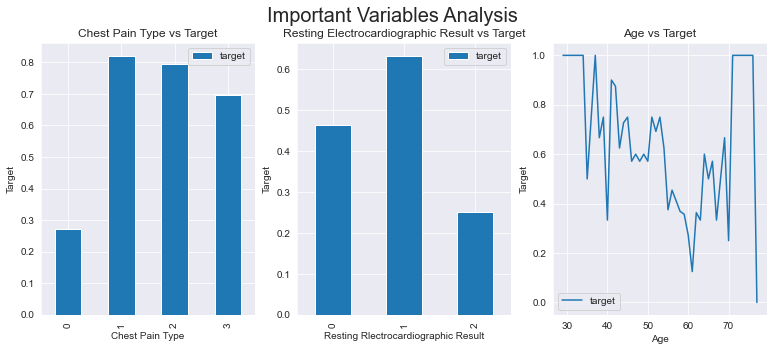

In [17]:
fig, ax = plt.subplots(1,3, figsize = (13,5))

cp_target.plot(kind = 'bar', ax = ax[0])
restecg_target.plot(kind = 'bar', ax = ax[1])
age_target.plot(kind = 'line', ax = ax[2])

ax[0].set_title("Chest Pain Type vs Target")
ax[0].set_xlabel("Chest Pain Type")
ax[0].set_ylabel("Target")

ax[1].set_title("Resting Electrocardiographic Result vs Target")
ax[1].set_xlabel("Resting Rlectrocardiographic Result")
ax[1].set_ylabel("Target")

ax[2].set_title("Age vs Target")
ax[2].set_xlabel("Age")
ax[2].set_ylabel("Target")

fig.suptitle("Important Variables Analysis", fontsize=20)

plt.show()

## Random Forest Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 100)

In [21]:
model = RandomForestClassifier(n_estimators = 10000, random_state = 1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=1)

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.881578947368421